# Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Understanding the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Handling Duplicates and Missing Values

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
pd.set_option('display.max_columns', None)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
df.drop(columns = ['car_ID'], inplace = True)

In [11]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [12]:
pd.set_option('display.max_rows', None)
df['CarName'].value_counts()

CarName
toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                    

In [13]:
df['CarName'] = df['CarName'].str.replace(r'^toy.*', 'toyota', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^peugeot.*', 'peugeot', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^subaru.*', 'subaru', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^mitsubishi.*', 'mitsubishi', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^ma.*', 'mazda', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^honda.*', 'honda', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^volvo.*', 'volvo', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^isuzu.*', 'isuzu', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^audi.*', 'audi', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^saab.*', 'saab', regex = True)
df['CarName'] = df['CarName'].str.replace(r'\b\w*issan.*', 'nissan', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^plymouth.*', 'plymouth', regex = True)
df['CarName'] = df['CarName'].str.replace(r'\b\w*swagen.*', 'volkswagen', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^renault.*', 'renault', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^por.*', 'porsche', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^vw.*', 'vw', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^alfa-romero.*', 'alfa-romero', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^dodge.*', 'dodge', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^chevrolet.*', 'chevrolet', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^jaguar.*', 'jaguar', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^mercury.*', 'mercury', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^buick.*', 'buick', regex = True)
df['CarName'] = df['CarName'].str.replace(r'^bmw.*', 'bmw', regex = True)

In [14]:
df['CarName'].value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
mercury         1
Name: count, dtype: int64

In [15]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [16]:
df_numeric_columns = df.select_dtypes(include=['int64', 'float64'])

df_numeric_columns.corrwith(df['price'])

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
dtype: float64

## Encoding Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['CarName'] = label_encoder.fit_transform(df['CarName'])
df['fueltype'] = label_encoder.fit_transform(df['fueltype'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['doornumber'] = label_encoder.fit_transform(df['doornumber'])
df['carbody'] = label_encoder.fit_transform(df['carbody'])
df['drivewheel'] = label_encoder.fit_transform(df['drivewheel'])
df['enginelocation'] = label_encoder.fit_transform(df['enginelocation'])
df['enginetype'] = label_encoder.fit_transform(df['enginetype'])
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem'])

In [18]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.680,9.00,111,5000,21,27,13495.000
1,3,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.680,9.00,111,5000,21,27,16500.000
2,1,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.470,9.00,154,5000,19,26,16500.000
3,2,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.400,10.00,102,5500,24,30,13950.000
4,2,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.400,8.00,115,5500,18,22,17450.000
5,2,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.400,8.50,110,5500,19,25,15250.000
6,1,1,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.400,8.50,110,5500,19,25,17710.000
7,1,1,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.400,8.50,110,5500,19,25,18920.000
8,1,1,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.400,8.30,140,5500,17,20,23875.000
9,0,1,1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,3.13,3.400,7.00,160,5500,16,22,17859.167


# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])
df_scaled = pd.DataFrame(scaled_features, columns=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'])
df = pd.concat([df.drop(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], axis=1), df_scaled], axis=1)


# Feature Selection

## 1. Correlation Analysis

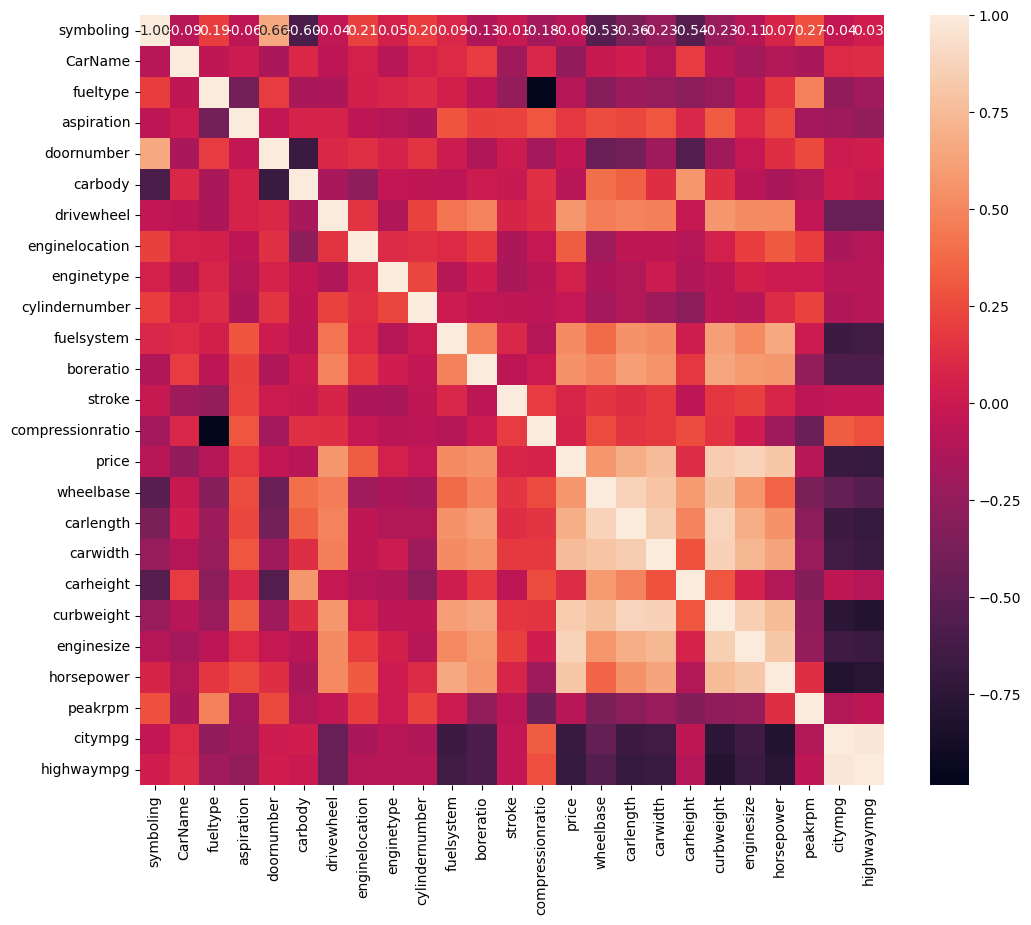

In [20]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [21]:
df.corr()['price']

symboling          -0.079978
CarName            -0.262066
fueltype           -0.105679
aspiration          0.177926
doornumber         -0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
enginetype          0.049171
cylindernumber     -0.027628
fuelsystem          0.526823
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
price               1.000000
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

## 2. Univariate Feature Selection

In [22]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Create a DataFrame to store feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

# Sort the DataFrame by scores in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

# Print the sorted feature scores
print(feature_scores_sorted)


             Feature       Score
19        enginesize  657.640421
18        curbweight  468.594431
20        horsepower  382.163409
16          carwidth  276.423646
23        highwaympg  192.437464
22           citympg  180.203163
15         carlength  177.420344
6         drivewheel  101.838772
14         wheelbase  101.745716
11         boreratio   89.507470
10        fuelsystem   77.985360
7     enginelocation   23.969740
1            CarName   14.969839
3         aspiration    6.636622
17         carheight    2.932716
2           fueltype    2.292741
21           peakrpm    1.486718
5            carbody    1.441705
0          symboling    1.306852
12            stroke    1.289311
13  compressionratio    0.942573
8         enginetype    0.492000
4         doornumber    0.205946
9     cylindernumber    0.155068


## 3. Recursive Feature Elimination (RFE)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=10)  # Adjust the number of features as needed
rfe = rfe.fit(X, y)

# Print the features selected
selected_features = [f for f, s in zip(X.columns, rfe.support_) if s]
print(f'Selected Features: {selected_features}')


Selected Features: ['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


## 4. Feature Importance from Tree-Based Models

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort features by importance
indices = importances.argsort()[::-1]
for i in indices:
    print(f'{X.columns[i]}: {importances[i]}')


enginesize: 0.6653448584111857
curbweight: 0.18633047841830924
highwaympg: 0.0515323553467331
horsepower: 0.01947998449438374
carwidth: 0.013608041011539883
CarName: 0.01116286518587657
compressionratio: 0.007770638926429343
carlength: 0.006842185291736113
wheelbase: 0.005868644593076029
peakrpm: 0.005539168721029375
citympg: 0.004721840169820926
carheight: 0.0038085458240764347
stroke: 0.0035003739540005927
boreratio: 0.0033888691050914877
fuelsystem: 0.0024251831756119746
carbody: 0.0018926402911566493
enginetype: 0.0013092246685376618
drivewheel: 0.0012155050019594237
cylindernumber: 0.0011683900741516955
aspiration: 0.0010653540023890472
symboling: 0.001048896806246211
fueltype: 0.0005759826850475116
doornumber: 0.00039784145462354537
enginelocation: 2.132386987728175e-06


## 5. Principal Component Analysis (PCA)

In [25]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=5)  # Adjust number of components based on variance explained
X_pca = pca.fit_transform(X)

# Print explained variance ratio
print(pca.explained_variance_ratio_)


[0.61744321 0.24379865 0.06402386 0.03076875 0.0176677 ]


## 6. Regularization Techniques

In [26]:
from sklearn.linear_model import Lasso

# Initialize and train the model
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X, y)

# Print the coefficients
for feature, coef in zip(X.columns, lasso.coef_):
    print(f'{feature}: {coef}')


symboling: 62.26386440449412
CarName: -222.08481934889318
fueltype: 1406.8321382945448
aspiration: 655.9953104447925
doornumber: -695.6665780338049
carbody: -892.2609330211243
drivewheel: 793.6937797627559
enginelocation: 11069.502310486627
enginetype: 148.2716583006335
cylindernumber: 211.62224020892904
fuelsystem: 81.83901939239855
boreratio: -713.14032873965
stroke: -2761.901361985509
compressionratio: 211.7383396840339
wheelbase: 4082.9744671817703
carlength: -830.0367576458585
carwidth: 7020.802754620184
carheight: 3232.0077314572527
curbweight: 6340.043483832695
enginesize: 22429.36385533882
horsepower: 6452.893005666773
peakrpm: 3367.3514075233197
citympg: -3096.782142122703
highwaympg: 4681.630438126888


### Feature Importance

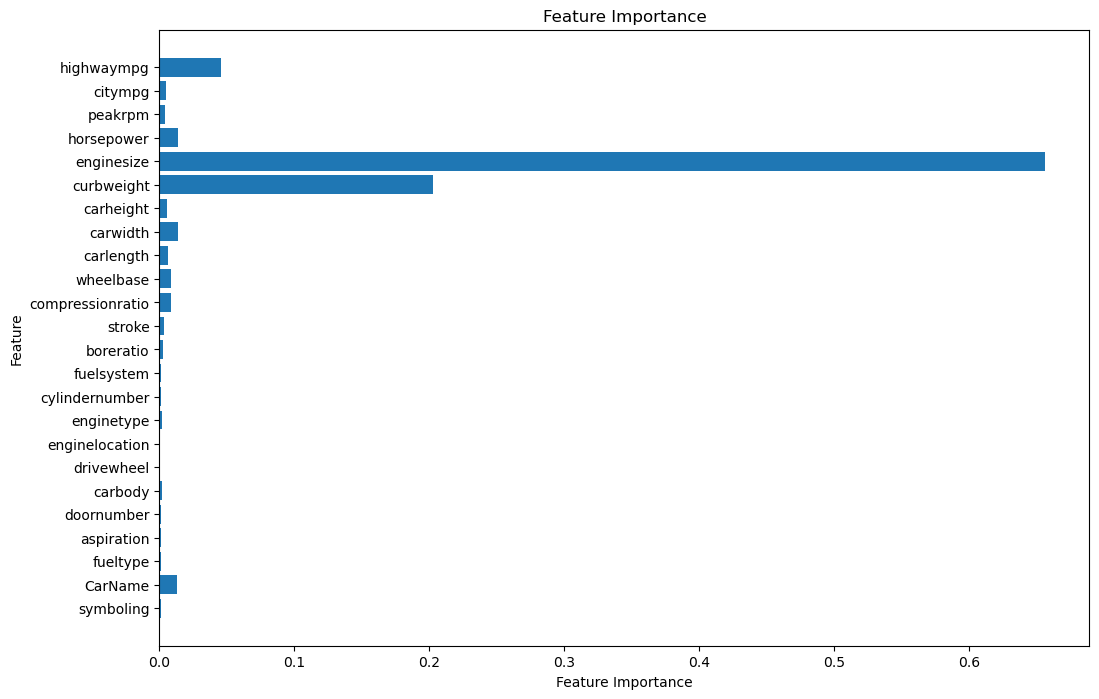

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importance = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# Model Training and Evaluation

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Define the selected features and target variable
important_features = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'citympg', 'highwaympg', 'carlength', 'wheelbase', 'drivewheel', 'enginelocation']
X = df[important_features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    # Store results
    results[name] = {
        'MAE ': mae,
        'MSE ': mse,
        'RMSE ': rmse,
        'R2 ': r2,
        'CV RMSE ': cv_rmse
    }
    
    print(f"{name} Metrics:")
    print(f"  MAE : {mae:.2f}")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  CV RMSE : {cv_rmse:.2f}")
    print(f"  R2 : {r2:.4f}\n")


Linear Regression Metrics:
  MAE : 2599.05
  MSE : 15139641.48
  RMSE : 3890.97
  CV RMSE : 4324.76
  R2 : 0.8082

Decision Tree Metrics:
  MAE : 1726.94
  MSE : 6648511.27
  RMSE : 2578.47
  CV RMSE : 5020.01
  R2 : 0.9158

Gradient Boosting Metrics:
  MAE : 1681.16
  MSE : 6586538.64
  RMSE : 2566.43
  CV RMSE : 3686.28
  R2 : 0.9166

AdaBoost Metrics:
  MAE : 2123.86
  MSE : 7705311.06
  RMSE : 2775.84
  CV RMSE : 3822.88
  R2 : 0.9024



# Model comparison report

In [29]:
from tabulate import tabulate

metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Gradient Boosting', 'AdaBoost'],
    'MAE ': [2599.05, 1972.93, 1666.06, 2008.54],
    'MSE ': [15139641.48, 9064369.75, 6534209.45, 7165888.11],
    'RMSE ': [3890.97, 3010.71, 2556.21, 2676.92],
    'CV RMSE ': [4324.76, 4670.16, 3614.86, 3851.15],
    'R²': [0.8082, 0.8852, 0.9172, 0.9092]
}
df_metrics = pd.DataFrame(metrics)

print(tabulate(df_metrics, headers='keys', tablefmt='grid', showindex=False))


+-------------------+---------+-------------+---------+------------+--------+
| Model             |    MAE  |        MSE  |   RMSE  |   CV RMSE  |     R² |
+===================+=========+=============+=========+============+========+
| Linear Regression | 2599.05 | 1.51396e+07 | 3890.97 |    4324.76 | 0.8082 |
+-------------------+---------+-------------+---------+------------+--------+
| Decision Tree     | 1972.93 | 9.06437e+06 | 3010.71 |    4670.16 | 0.8852 |
+-------------------+---------+-------------+---------+------------+--------+
| Gradient Boosting | 1666.06 | 6.53421e+06 | 2556.21 |    3614.86 | 0.9172 |
+-------------------+---------+-------------+---------+------------+--------+
| AdaBoost          | 2008.54 | 7.16589e+06 | 2676.92 |    3851.15 | 0.9092 |
+-------------------+---------+-------------+---------+------------+--------+


# Report on Challenges faced 



### Challenges Faced and Techniques Used

- **Label Encoding**: Some categorical features, like `drivewheel` and `enginelocation`, required encoding for the model to interpret them. I used label encoding to transform these categories into numeric values, making sure to maintain the information they represent.

- **Feature Selection**: Identifying the most important features was crucial to improving model performance. I applied several methods like:
  - **Correlation Analysis** to check relationships between variables and `price`, which helped me remove less relevant features.
  - **Recursive Feature Elimination (RFE)** to iteratively eliminate less important features and retain the best predictors.
  - **Tree-based Models** to rank features by importance, giving insights into which variables contributed most to predictions.
  - **Principal Component Analysis (PCA)** and **Univariate Analysis** helped in reducing dimensionality and narrowing down the list of important features.
  - **Regularization** techniques such as Lasso also assisted in automatic feature selection by penalizing less impactful ones.

- **Overfitting**: During model evaluation, I noticed that some models, especially Decision Trees, were prone to overfitting. To counter this:
  - I tuned hyperparameters and used cross-validation to ensure the model generalized well to new data.
  - Regularization techniques, like Lasso and Ridge, helped reduce overfitting by simplifying models.

- **Model Selection**: Choosing the right model for prediction was challenging. I evaluated multiple models like Linear Regression, Decision Trees, Gradient Boosting, and AdaBoost. The comparison based on metrics like **R²**, **RMSE**, and **MAE** guided my decision-making. Gradient Boosting stood out as the best-performing model based on its balance between error metrics and cross-validation results.

- **Model Evaluation**: Using cross-validation was important to ensure the stability of my models. It helped me understand how the model would perform on unseen data and prevented over-reliance on a sin your individual project.